# Clustering

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

## Scale the Data

In [3]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## Principal Component Analysis (PCA)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

## Create a Dendrogram

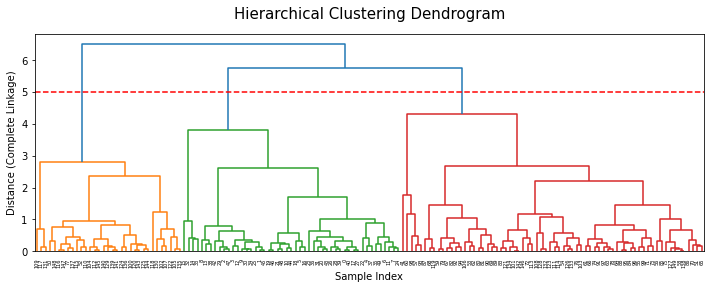

In [11]:
plt.figure(figsize=(12, 4))
linkage_matrix = linkage(X_pca, method='complete', metric='euclidean')
dendrogram(linkage_matrix, truncate_mode='level', p=30)
plt.title('Hierarchical Clustering Dendrogram', size=15, pad=15)
plt.xlabel('Sample Index')
plt.ylabel('Distance (Complete Linkage)')
plt.axhline(y=5, color='r', linestyle='--')
plt.savefig("Dendrogram.png", dpi=80)

In [17]:
X=iris['data']
Y=iris.target

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [18]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


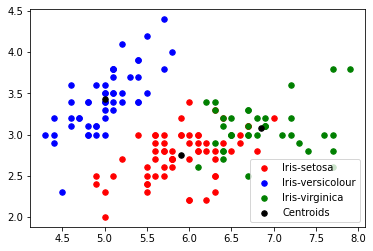

In [25]:
# Display cluster centers
print(kmeans.cluster_centers_) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 30, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()